# VAMPNets
https://deeptime-ml.github.io/latest/notebooks/examples/ala2-example.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import mdshare  # for trajectory data

from tqdm.notebook import tqdm  # progress bar

/home/solhee/anaconda3/envs/folding-env/lib/python3.10/site-packages/mdshare/__init__.py:24: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# Use GPU if possible
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.backends.cudnn.benchmark = True
elif torch.backends.mps.is_available():
    device = torch.device("mps")  # Apple GPU 사용
    print("Using Apple MPS (Metal) GPU")
else:
    device = torch.device("cpu")
torch.set_num_threads(12)

print(f"Using device {device}")

Using device cuda


In [3]:
# Obtain the data via mdshare
# Alanine Dipeptide
ala_coords_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-heavy-atom-positions.npz", working_directory="data"
)
with np.load(ala_coords_file) as fh:
    data = [fh[f"arr_{i}"].astype(np.float32) for i in range(3)]

# Dihedral : backbone angle, phi & psi
dihedral_file = mdshare.fetch(
    "alanine-dipeptide-3x250ns-backbone-dihedrals.npz", working_directory="data"
)
with np.load(dihedral_file) as fh:
    dihedral = [fh[f"arr_{i}"] for i in range(3)]                   # dihedral has AD protein backbone

Data is list, with len =3

data[0], [1], [2] includes three independent simulations.
(https://markovmodel.github.io/mdshare/ALA2/#alanine-dipeptide)

In [4]:
d0 = data[0]
d1 = data[1]
d2 = data[2]


print(f"Shape of data[0]: {d0.shape}")
print(f"{d0.shape[0]} is number of frames")
print(f"{d0.shape[1]} is 3* 10, 3Dimensional, 10 heavy atoms")


Shape of data[0]: (250000, 30)
250000 is number of frames
30 is 3* 10, 3Dimensional, 10 heavy atoms


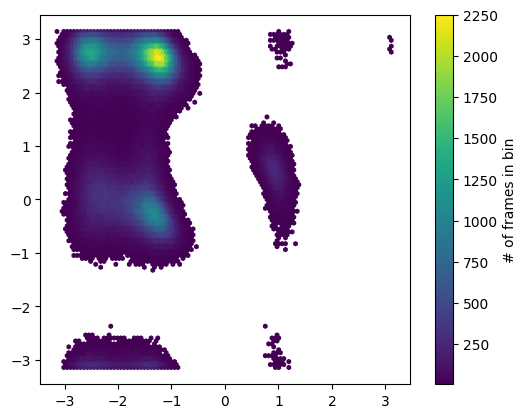

In [7]:
fig, ax = plt.subplots(1, 1)
hb = ax.hexbin(*np.concatenate(dihedral).T, mincnt=5) # Draw Heatmap(hexbin)
ax.set_aspect('equal') # Ratio of x, y axis are equal
cb = fig.colorbar(hb, ax=ax)
cb.set_label('# of frames in bin')

X, Y axis are ~3.14- 3.14
Because angles are in radian